In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt


In [7]:
df = pd.read_csv('Capstone/Full Dataset.csv',index_col=0)
df_copy = df.copy()

In [8]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DBPM,BPM,VORP,Year_x,All_Star,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share
0,Kareem Abdul-Jabbar,5,32,LAL,82,0,38.3,10.2,16.9,0.604,...,2.4,7.2,7.3,1980,1.0,1.0,147.0,147.0,221.0,0.665
1,Tom Abernethy,4,25,GSW,67,0,18.2,2.3,4.7,0.481,...,-0.2,-1.2,0.2,1980,0.0,0.0,0.0,0.0,0.0,0.000
2,Alvan Adams,5,25,PHO,75,0,28.9,6.2,11.7,0.531,...,1.9,3.6,3.1,1980,0.0,0.0,0.0,0.0,0.0,0.000
3,Tiny Archibald,1,31,BOS,80,80,35.8,4.8,9.9,0.482,...,-0.3,1.1,2.3,1980,1.0,5.0,2.0,2.0,221.0,0.009
4,Dennis Awtrey,5,31,CHI,26,0,21.5,1.0,2.3,0.450,...,0.9,-1.4,0.1,1980,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,Thaddeus Young,4,33,TOT,52,1,16.3,2.7,5.2,0.518,...,2.1,2.2,0.9,2022,0.0,0.0,0.0,0.0,0.0,0.000
18260,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,0.460,...,-2.0,5.2,4.8,2022,0.0,0.0,0.0,0.0,0.0,0.000
18261,Omer Yurtseven,5,23,MIA,56,12,12.6,2.3,4.4,0.526,...,0.4,-1.0,0.2,2022,0.0,0.0,0.0,0.0,0.0,0.000
18262,Cody Zeller,5,29,POR,27,0,13.1,1.9,3.3,0.567,...,-1.0,-2.1,0.0,2022,0.0,0.0,0.0,0.0,0.0,0.000


In [14]:
X = df.drop(columns=['Player','Tm','GS','Year_x','MVP_Rank','MVP_First','MVP_Pts Won','MVP_Pts Max','MVP_Share','All_Star'],)
y = pd.Categorical(df['All_Star'])
y

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[1.0, 0.0, 0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 18264
Categories (2, float64): [0.0, 1.0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

<AxesSubplot:xlabel='Importance', ylabel='Features'>

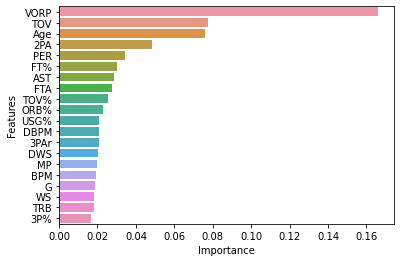

In [25]:
feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)

feat_importances = feat_importances.reset_index()
feat_importances.columns = ['Features','Importance']

sns.barplot(x='Importance',y='Features',data=feat_importances.nlargest(20,columns=['Importance']).sort_values(ascending=False,by='Importance'))